In [1]:
import time , os
from tensorflow import keras
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time
import base64
from io import BytesIO
import random
import numpy as np


In [4]:
(X_TRAIN,Y_TRAIN),(X_TEST,Y_TEST) = keras.datasets.fashion_mnist.load_data()
X_TEST1 = X_TEST/255.0
X_TRAIN1 = X_TRAIN/255.0

In [34]:
# adding noice 
noise_factor = 0.5

X_TRAIN = X_TRAIN1 + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_TRAIN1.shape)
X_TEST = X_TEST1 + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_TEST1.shape)

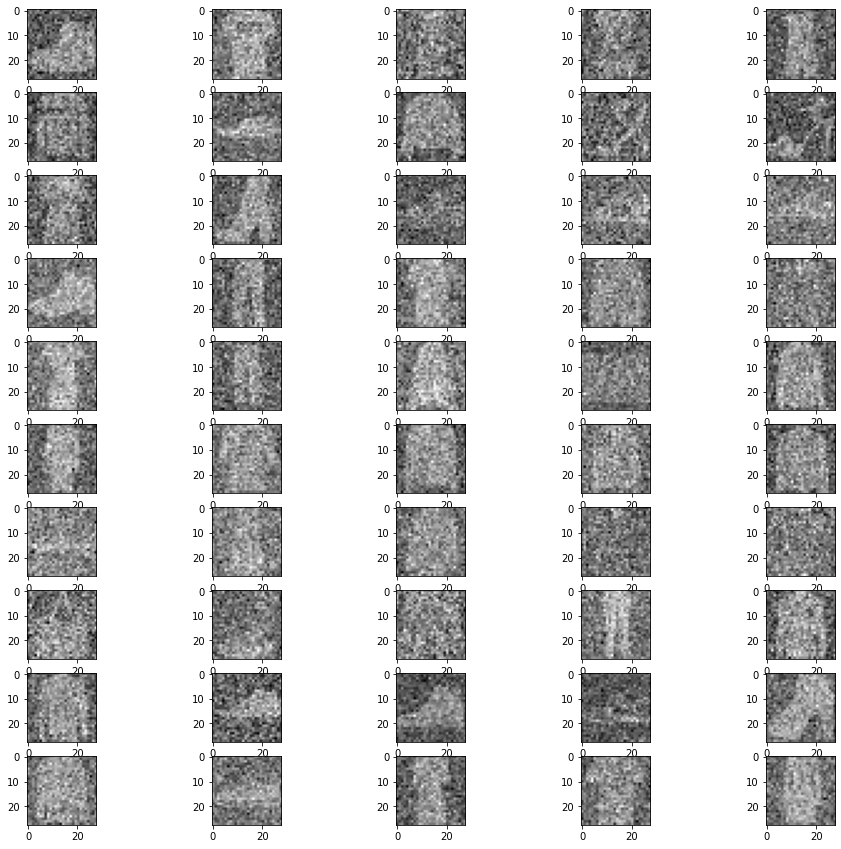

In [35]:
fig,axe = plt.subplots(10,5,figsize=(16,15))

c=0
for i in range(10):
  for j in range(5):
    axe[i,j].imshow((X_TRAIN[c]),cmap='gray')
    c=c+1

In [50]:
from os import walk
import warnings
warnings.filterwarnings( "ignore", message = "WARNING", )
def compare_models(mypath,img):
    

    f = []
    for (dirpath, dirnames, filenames) in walk(mypath):
        f.extend(dirnames)
        break
        
   
    fig,axe = plt.subplots(2,5,figsize=(15,15))
    i = -1
    j=0
    count = 0
    for path in f:

      try:
        p ="Models/"+str(path)
        
        model = keras.models.load_model(p)
        img2 = model.predict(img.reshape(28,28).reshape(-1,28,28,1))[0]
        j = count%5 
        
        if j==0:
            i = i + 1
      
        axe[i,j].imshow(img2.reshape(28,28),cmap='gray')
        count = count + 1
      except:
        print("Error with : ",p)
        pass
        

In [15]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D,Input
from keras import Model

In [16]:
Names = []
Models = []

In [54]:
#Conv layer NEWWWWWW


def Conv_Autoencoder(x_train,y_train,conv_values = [16,8,8],shape_x=28, shape_y=28, channel=1, filter_size=(3,3), pool_size=(2,2),epochs= 5,batch_size = 128,decay=1e-6):    
    
    encoder_input = Input(shape=(shape_x,shape_y, channel))
    #conv_layers = []
    layers = []
    shape = shape_x


   
    conv = len(conv_values)
    for i in range(conv):
      
        
        shape = conv_values[i]#int(shape/2) # output of every new Conv would be 1/2 of prev by default
        
        if i == 0:
            layer = Conv2D(shape,filter_size,activation='relu',padding='same')(encoder_input)
        
        else:
            layer = Conv2D(shape,filter_size,activation='relu',padding='same')(layer)
        
        layer = MaxPooling2D(pool_size = pool_size,padding='same')(layer)
     
        
    
    encoded = layer # last layer
    encoder = Model(encoder_input, encoded)
  
    for i in range(conv):
        shape = conv_values[-i-1]
        print("Decoded : ",shape)
        if i == 0:
            layer = Conv2D(shape,filter_size,activation = 'relu',padding='same')(encoded)
        else:
            if i==2:
              layer = Conv2D(shape,filter_size,activation = 'relu')(layer)
            else:
              layer = Conv2D(shape,filter_size,activation = 'relu',padding='same')(layer)
        
        layer = UpSampling2D(pool_size)(layer)
        
        
    
    decoded = Conv2D(1, filter_size, activation = 'sigmoid' ,padding='same')(layer)
    # ????
    autoencoder = Model(encoder_input,decoded)
    print(autoencoder.summary())
    optimizer = keras.optimizers.Adam(decay=decay)
    autoencoder.compile( optimizer = optimizer , loss='mse' )#loss = 'binary_crossentropy' )
    
    
    
    
    name = "Models/FasionCNN_MODELS_epochs_{}_channel_{}_covlayer_{}_batch_size_{}_decay{}_NoiceLevel_{}_convlayer_{}_64".format(epochs,channel,conv,batch_size,decay,noise_factor,str(conv_values))
    
    autoencoder.fit(x_train,y_train,epochs=epochs,batch_size = batch_size)
    
    autoencoder.save(name)
    Models.append(autoencoder)
    Names.append(name)
    return autoencoder
        
        

        

In [55]:
x = X_TRAIN#.reshape((len(X_TRAIN),28,28, 1))*
y = X_TRAIN1
model = Conv_Autoencoder(x,y,conv_values = [64],epochs=50)

Decoded :  64
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
up_sampling2d_9 (UpSampling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 1)         577       
Total params: 38,145
Trainable params: 38,145
Non-trainable params: 0
________________________________________

['Models/FasionCNN_MODELS_epochs_10_channel_1_covlayer_1_batch_size_128_decay1e-06_', 'Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_1_batch_size_128_decay1e-06_NoiceLevel_0.2_', 'Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_3_batch_size_128_decay1e-06_NoiceLevel_0.2_convlayer_[16, 8, 8]_', 'Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_1_batch_size_128_decay1e-06_NoiceLevel_0.5_convlayer_1_', 'Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_2_batch_size_128_decay1e-06_NoiceLevel_0.5_convlayer_2_', 'Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_1_batch_size_128_decay1e-06_NoiceLevel_0.5_convlayer_[64]_64']
6
0 Models/FasionCNN_MODELS_epochs_10_channel_1_covlayer_1_batch_size_128_decay1e-06_ dict_keys([])
Error :  0
1 Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_1_batch_size_128_decay1e-06_NoiceLevel_0.2_ dict_keys([])
Error :  1
2 Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_3_batch_size_128_decay1e-06_NoiceLevel_0.2_convlayer_[16, 8, 8

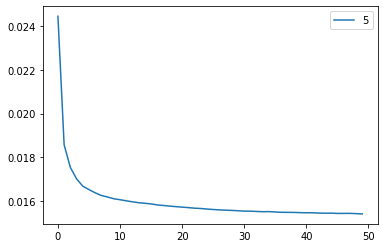

In [56]:
count = 0
lig = []
print(Names)
print(len(Models))
for models in Models:
  
  print(count,Names[count],models.history.history.keys())
  try:
    loss = models.history.history['loss']
    ep = models.history.epoch
    lig.append(count)
    
    plt.plot(ep,loss)
  except:
    print("Error : ",count)
    pass
  count = count + 1
plt.legend(lig)
#model.history.epoch

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


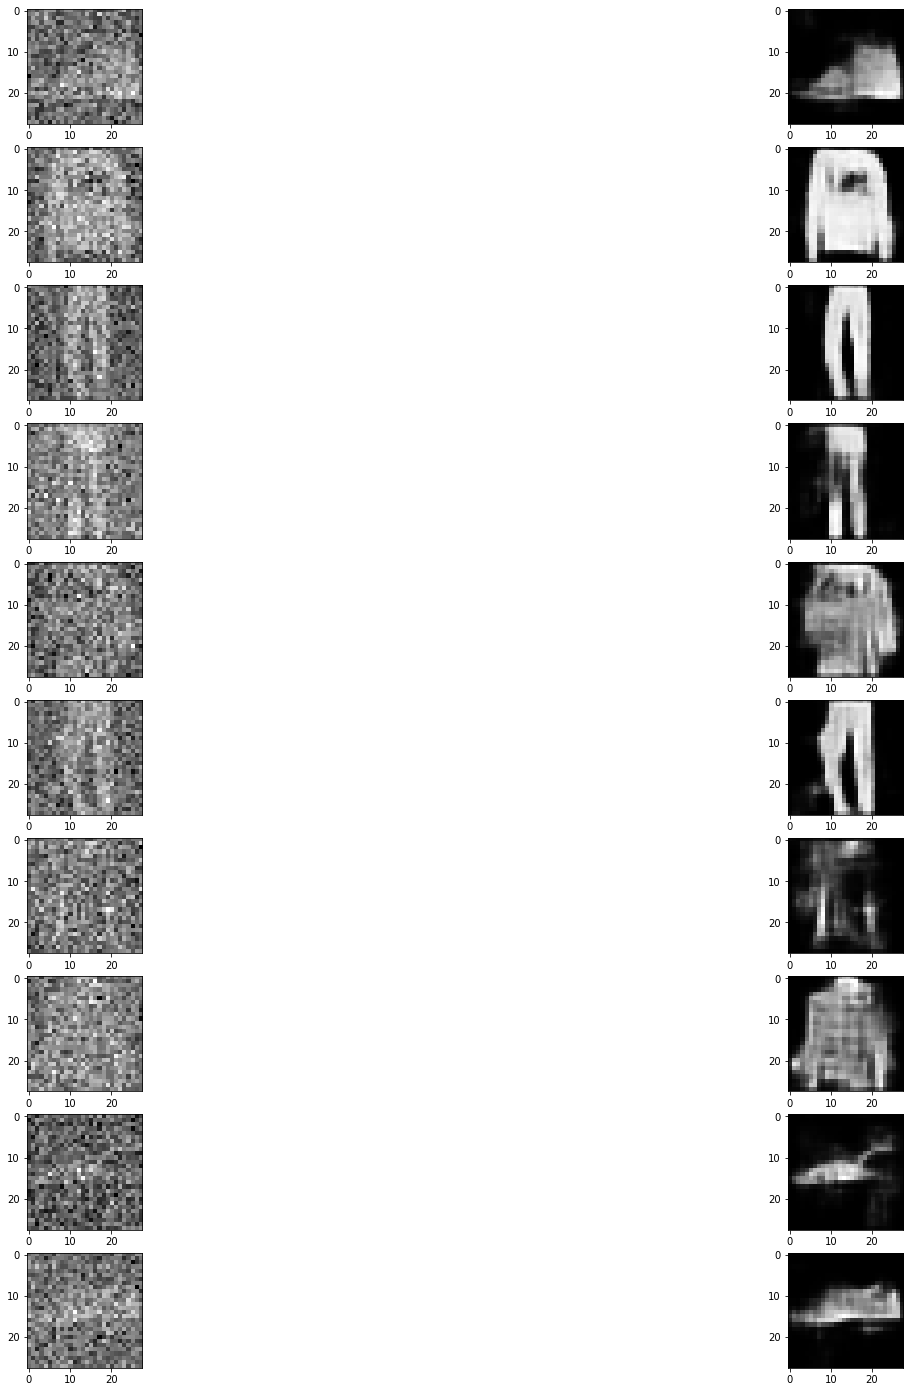

In [57]:
# MODEL RESULTS
rows = 10
fig,axs = plt.subplots(rows,2,figsize=(25,25))

for i in range(len(X_TEST[:rows])):
    
    values = X_TEST[i]
    
    axs[i,0].imshow(values,cmap='gray')
    img = model.predict(values.reshape(-1,28,28,1))[0]
    print(img.shape)
    axs[i,1].imshow(img.reshape(28,28),cmap='gray')
    
   
    

Error with :  Models/.ipynb_checkpoints
Error with :  Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_1_batch_size_128_decay1e-06_NoiceLevel_0.5_convlayer_[64]_64


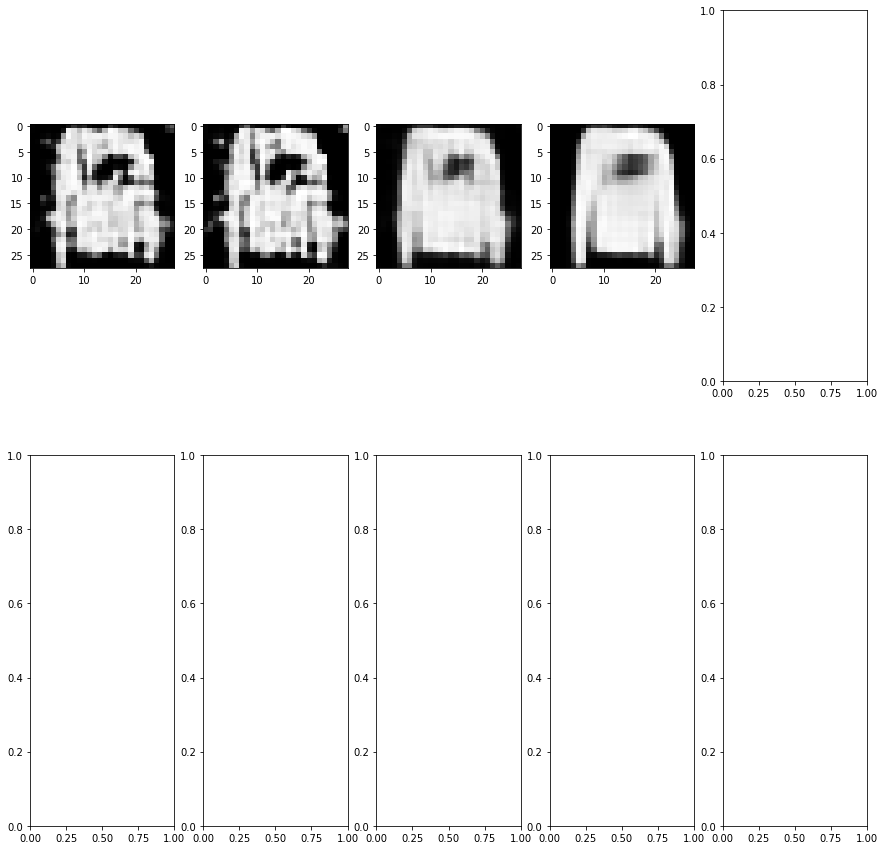

In [58]:
values = X_TEST[1]
compare_models(r"/content/Models",values)

In [62]:
# adding noice 
noise_factor = 0.1

X_TRAIN = X_TRAIN1 + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_TRAIN1.shape)
X_TEST = X_TEST1 + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_TEST1.shape)

In [63]:
Names = []
Models = []

In [64]:
# DNN NOICE REDUCTION MODEL

In [76]:

class AutoEncoder:
    
    def __init__(self,shape_x=28,shape_y=28,channels=1,dense=0,dense_values=[64,32,16],output=64,lRate=0.001,epochs=3,batch_size=32) :
        self.shape_x = shape_x
        self.shape_y = shape_y
        self.channels = channels
        self.autoencoder = None
        self.encoder = None
        self.dense = dense
        self.dense_values = dense_values
        self.output = output
        self.lRate = lRate
        self.epochs = epochs
        self.batch_size = batch_size
        
        (self.X_TRAIN,self.Y_TRAIN),(self.X_TEST,self.Y_TEST) = keras.datasets.mnist.load_data()
    
    def Autoencoder(self,x_data,y_data):
        
        # dense => No of Dense Layers
        # dense_values = is a list of no of cell per dense layer by default they will get value nearest to perfect sq
        # max hidden layer 3
        # output is set to 64 for dense = 0
        
        # may be would add LSTM etc
        
        if self.dense > 3:
            return 'Error- Chossen More than 3 dense layers!!!'
        
        
        #  Encoder -- 
        
        encoder_input = keras.Input((self.shape_x,self.shape_y,self.channels))
        flaten = keras.layers.Flatten()(encoder_input)
        
        dense_layers = []
        
        if self.dense > 0:
            for i in range(self.dense):
                
                if i == 0 :
                    layer = keras.layers.Dense(self.dense_values[i],activation='relu')(flaten)
                else:
                    layer = keras.layers.Dense(self.dense_values[i],activation='relu')(dense_layers[-1])
                    
                dense_layers.append(layer)
            
       
        if len(dense_layers) == 0:
            encoder_output = keras.layers.Dense(self.output)(flaten)
        else:
            encoder_output = keras.layers.Dense(self.output)(dense_layers[-1])
        
        # Encoder Model
        self.encoder = keras.Model(encoder_input,encoder_output)
        
        # Decoder --
        
        decoder_layers = []
        
        if self.dense > 0:
            for i in range(self.dense-1,-1,-1):
                print("I : ",i)
                if i == self.dense-1:
                    layers = keras.layers.Dense(self.dense_values[i],activation='relu')(encoder_output)
                else:
                    layers = keras.layers.Dense(self.dense_values[i],activation='relu')(decoder_layers[-1])
                    
                decoder_layers.append(layers)
                
            
        if self.dense == 0:
            decoder_out = keras.layers.Dense(self.shape_x*self.shape_y,activation='relu')(encoder_output)
            
        else:
            decoder_out = keras.layers.Dense(self.shape_x*self.shape_y,activation='relu')(decoder_layers[-1])
            
        decoder_output = keras.layers.Reshape((28,28,1))(decoder_out)
        
        optimizer = keras.optimizers.Adam(learning_rate = self.lRate)
        
        self.autoencoder = keras.Model(encoder_input,decoder_output)
        self.autoencoder.compile(optimizer,loss='mse')
        print(self.autoencoder.summary())
        self.autoencoder.fit(x_data,y_data,epochs=self.epochs,batch_size=self.batch_size)
        
        self.SaveModel()
        return self.autoencoder 
        
        
    def SaveModel(self):
        name = "Models/DNNancoder_dense_{}_epochs_{}_neck_{}_time_{}".format(self.dense,self.epochs,self.output,time.time())
        self.autoencoder.save(name)
        # name = "Models/DNNancoder_dense_{}_epochs_{}_neck_{}_time_{}_enco".format(self.dense,self.epochs,self.output,time.time())
        # self.encoder.save(name)
        Models.append(self.autoencoder)
        Names.append(name)
    
    def train(self,object1,train_on = 1,save=False):
        # % of data to train on

        x_train = (self.X_TRAIN[:int(len(self.X_TRAIN)*train_on)])/255.0
        object1.Autoencoder(x_train,x_train)                                                                   
        if save == True:
            self.SaveModel()

    
    def test(self,img1=None):
        
        if img1 == None:
            x_test = self.X_TEST/255.0
            indx = random.randint(0,len(x_test))
            img = x_test[indx]
        else:
            img = img1
            
            
        plt.imshow(img,cmap='gray')
        plt.show()
        return self.autoencoder.predict(img.reshape(-1,28,28,1))[0]
    
 

def get_embidding_space(path,dim):
    
    plt.switch_backend("AGG")
    
    path = path + "enco"
    (X_TRAIN,Y_TRAIN),(X_TEST,Y_TEST) = keras.datasets.mnist.load_data()
    x,sample_labels = select_images(X_TEST,Y_TEST,num_images=int(len(X_TEST)*0.98))
    
    model = keras.models.load_model(path)
    latent_representations = model.predict(x)
    
    print("3333 DDDD ---- > : ",dim,latent_representations.shape)
    print(latent_representations[0])
    print(latent_representations[1])
    print(latent_representations[0,0])
    
    if dim >= 2:
        
        plt.scatter(latent_representations[:, 0],
                    latent_representations[:, 1],
                    cmap="rainbow",
                    c=sample_labels,
                    alpha=0.5,
                    s=2)
        plt.colorbar()
        graph = get_graph()
        
    elif dim == 3 :
        print("we are in ")

        ax = plt.axes(projection='3d')
        
        ax.scatter3D(latent_representations[:, 0],
                    latent_representations[:, 1],
                    latent_representations[:, 2],
                    # cmap="rainbow",
                    # c=sample_labels,
                    # alpha=0.5,
                    #s=2
                    )
        plt.colorbar()
        graph = get_graph()
    else:
        graph = -1
        
        
    return graph



def plot_images_encoded_in_latent_space(latent_representations,sample_labels):
    plt.figure(figsize=(10, 10))
    plt.scatter(latent_representations[:, 0],
                latent_representations[:, 1],
                cmap="rainbow",
                c=sample_labels,
                alpha=0.5,
                s=2)
    plt.colorbar()
    plt.show()
    

def select_images(images, labels, num_images=10):
    sample_images_index = np.random.choice(range(len(images)), num_images)
    sample_images = images[sample_images_index]
    sample_labels = labels[sample_images_index]
    return sample_images, sample_labels

    
    
    
def predict(img,val):
    plt.switch_backend("AGG") 
   
    if val == 'mod1': #mlai\Models\ancoder_dense_0_epochs_3_neck_64_time_1624556327.7832968
        path = 'D:/User/Desktop/new/AutoEncoderWeb/mlai/Models/ancoder_dense_0_epochs_3_neck_64_time_'
        info = [0,64,0]
    elif val == 'mod2':#mlai\Models\ancoder_dense_0_epochs_3_neck_2_time_1624556145.351937
        path = 'D:/User/Desktop/new/AutoEncoderWeb/mlai/Models/ancoder_dense_0_epochs_3_neck_2_time_'
        info = [0,2,0]
    else : #mlai\Models\ancoder_dense_0_epochs_3_neck_3_time_1624556280.213778
        path = 'D:/User/Desktop/new/AutoEncoderWeb/mlai/Models/ancoder_dense_0_epochs_3_neck_3_time_'
        info = [0,3,0]
        
    emb_img = get_embidding_space(path,info[1])
        
    model = keras.models.load_model(path)
    img = model.predict(img.reshape(-1,28,28,1))[0]
    plt.imshow(img,cmap='gray')
    graph = get_graph()
    return (graph , emb_img,info)


def get_graph():
    
    buffer = BytesIO()
    plt.savefig(buffer,format='png')
    buffer.seek(0)
    img_png = buffer.getvalue()
    graph = base64.b64encode(img_png)
    graph = graph.decode('utf-8')
    buffer.close()    
    return graph
        
def get_Img():
    plt.switch_backend("AGG")
    (X_TRAIN,Y_TRAIN),(X_TEST,Y_TEST) = keras.datasets.mnist.load_data()
    
    ind = random.randint(0,len(X_TEST))
    img = X_TEST[ind]
    plt.imshow(img,cmap='gray')
    graph = get_graph()
    return (graph,img)
    

In [72]:
Names

[]

In [78]:
auto = AutoEncoder(dense=1,output=64,epochs=50)

model = auto.Autoencoder(X_TRAIN,X_TRAIN1)



I :  0
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 784)               50960     
_________________________________________________________________
reshape_3 (Reshape)          (None, 28, 28, 1)      

['Models/DNNancoder_dense_1_epochs_1_neck_64_time_1625313088.858741', 'Models/DNNancoder_dense_1_epochs_50_neck_64_time_1625313300.1821518']
3
Error :  0


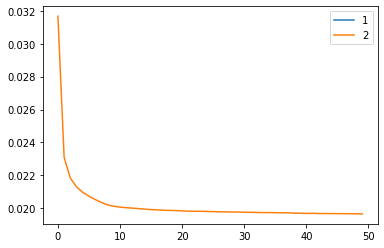

In [80]:
count = 0
lig = []
print(Names)
print(len(Models))
for models in Models:
  
 
  try:
    loss = models.history.history['loss']
    ep = models.history.epoch
    lig.append(count)
    
    plt.plot(ep,loss)
  except:
    print("Error : ",count)
    pass
  count = count + 1
plt.legend(lig)
#model.history.epoch

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


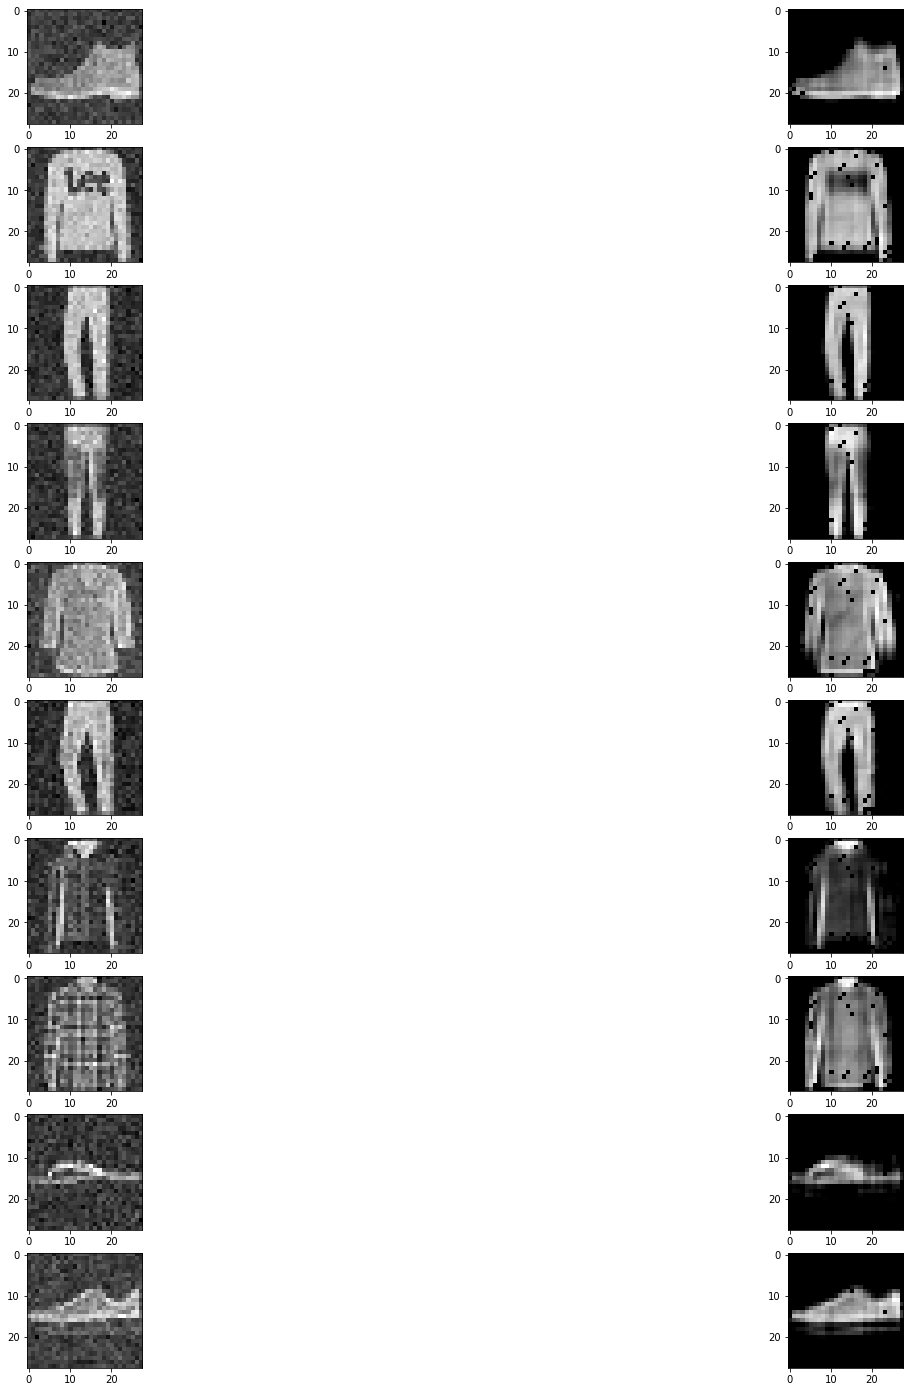

In [81]:
# MODEL RESULTS
rows = 10
fig,axs = plt.subplots(rows,2,figsize=(25,25))

for i in range(len(X_TEST[:rows])):
    
    values = X_TEST[i]
    
    axs[i,0].imshow(values,cmap='gray')
    img = model.predict(values.reshape(-1,28,28,1))[0]
    print(img.shape)
    axs[i,1].imshow(img.reshape(28,28),cmap='gray')
    
   
    

Error with :  Models/.ipynb_checkpoints
Error with :  Models/FasionCNN_MODELS_epochs_50_channel_1_covlayer_1_batch_size_128_decay1e-06_NoiceLevel_0.5_convlayer_[64]_64
Error with :  Models/DNNancoder_dense_1_epochs_50_neck_14_time_1625312414.5274658_enco


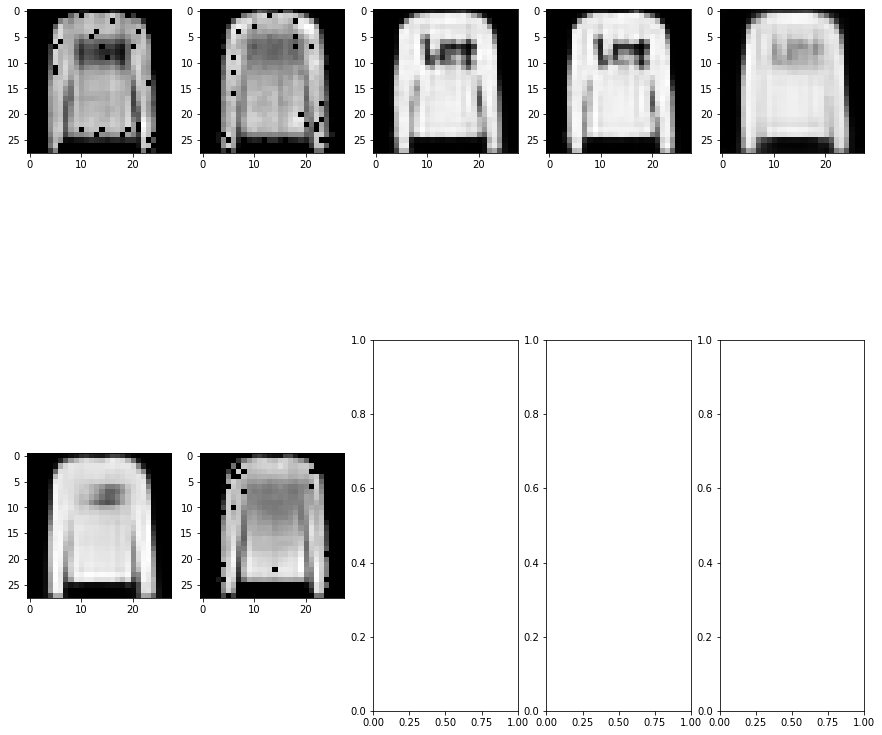

In [82]:
values = X_TEST[1]
compare_models(r"/content/Models",values)